In [143]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.optimize import minimize

## Dataset

In [236]:
s = """
# 0       1       2         | 3          4
# Current Voltage Vibration | Error rate Faulty
  0.61     9.9     24.7        0.02     0
  0.38    11.8    254.3        6.24     1
  0.53    14.9     26.2        0.01     0
  0.45    15.9     22.7        0.01     0
  0.63    11.2    312.1        3.12     1
  0.35    12.8    254.7        6.21     1
  0.29    12.2    315.7        5.92     1
  0.39     8.8    244.9        6.31     1
  0.25    19.2     51.2        0.03     0
  0.35    10.1     10.2        0.02     0
  0.47    10.9     25.7        0.03     0
  0.32    15.8    234.1        6.51     1
"""
D = np.genfromtxt(str.encode(s).splitlines())

In [237]:
d={}
d['x']=D[:,1:3]
d['y']=D[:,3]

In [238]:
print(d['x'][0])
print(d['y'][0])

[  9.9  24.7]
0.02


In [239]:
from mpl_toolkits.mplot3d import Axes3D

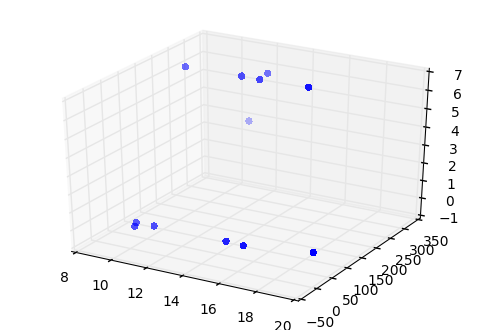

In [240]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X=d['x'][:,0]
Y=d['x'][:,1]
Z=d['y']
surf = ax.scatter(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

## Model

In [241]:
def f(x,w): return w[0] + x[0]*w[1] + x[1]*w[2]

In [242]:
def dist(a,b): return (a-b)**2

In [243]:
def loss(w,d):
    loss = 0
    for i in range(len(d['x'])):
        x = d['x'][i]
        y = d['y'][i]
        loss += dist(f(x,w),y)
    return loss

In [244]:
loss([0,-1,0],d)

3111.7815000000001

In [245]:
def F(w): return loss(w,d)

## Visualize Loss Function

In [246]:
# def F(w): return (w[1]-0.2)**2 

In [247]:
xlim = (-0.05,0.05,200)
ylim = (-0.05,0.05,200)
X = np.linspace(*xlim)
Y = np.linspace(*ylim)
Z = np.array([[ F([-0.3,x,y]) for x in X] for y in Y ])

def rescale(Z):
    z_min = np.percentile(Z,0)
    z_max = np.percentile(Z,80)
    z_range = z_max - z_min
    Z_scaled = (Z-z_min)/z_range
    Z_scaled[Z_scaled > 1] = 1
    return Z_scaled

Z_scaled = rescale(Z)

# left right bottom top
extent = (xlim[0],xlim[1],ylim[1],ylim[0])
x_range = xlim[1]-xlim[0]
y_range = ylim[1]-ylim[0]
aspect = x_range/y_range/2
print(extent)

(-0.05, 0.05, 0.05, -0.05)


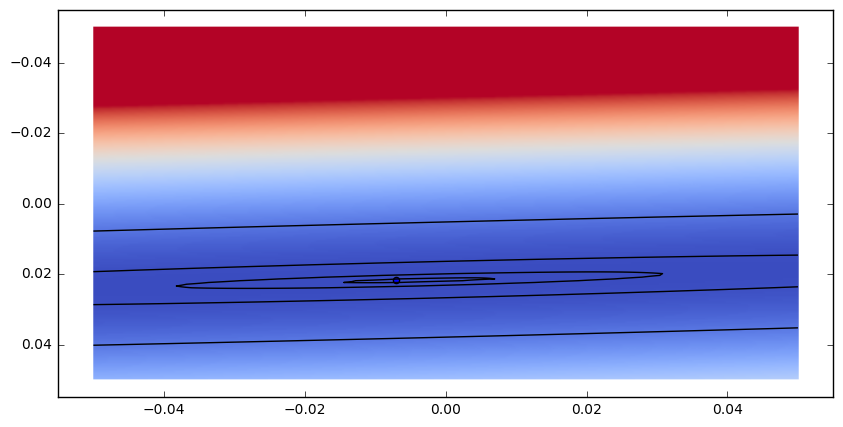

In [248]:
plt.figure(figsize=(10,10))
plt.imshow(Z,cmap=cm.coolwarm,vmin=np.min(Z),vmax=np.percentile(Z,80), extent=extent, aspect=aspect)
plt.contour(X,Y,Z_scaled,[0.0001, 0.001, 0.01, 0.1,11],colors="black")
plt.scatter(*w_hat[1:])

## Minimize the Loss using Numerical Optimization

In [249]:
M=minimize(F,[0,0,0])

In [250]:
w_hat=M.x
print(w_hat)
print(F(w_hat))

[-0.2668125  -0.00583702  0.02168744]
19.1119021359


## Optimal Model

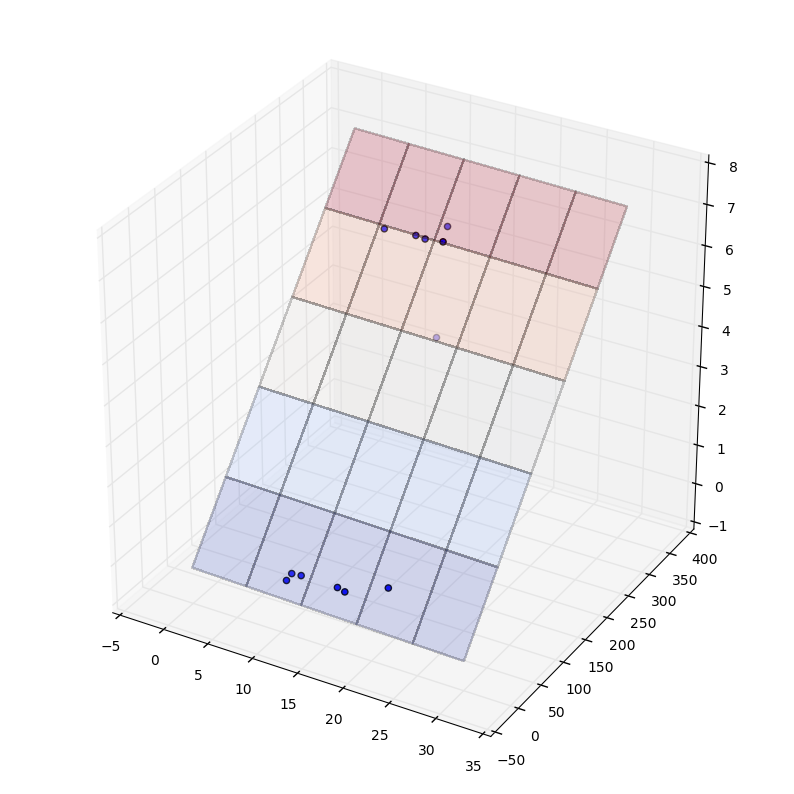

In [251]:
fig = plt.figure(figsize=(10,10))

ax = fig.gca(projection='3d')
X = np.linspace(0,30,50)
Y = np.linspace(0,350,50)
MX,MY = np.meshgrid(X,Y)
Z = [[ f([x,y],w_hat) for x in X ] for y in Y ]

ax.plot_surface(MX,MY,Z,cmap=cm.coolwarm, antialiased=False,alpha=0.2)

X=d['x'][:,0]
Y=d['x'][:,1]
Z=d['y']
ax.scatter(X, Y, Z,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e50c048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ed84278>]], dtype=object)

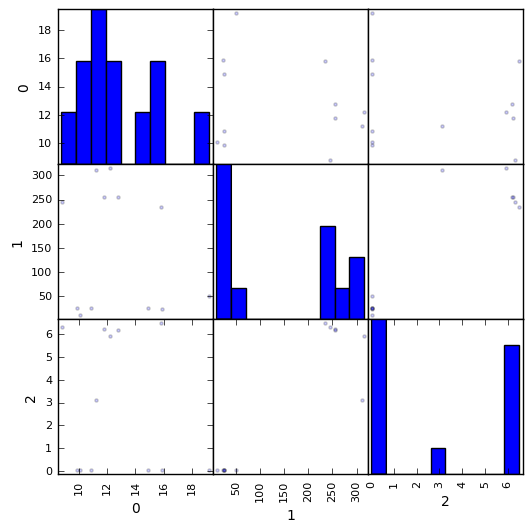

In [252]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
M = np.array([d['x'][:,0],d['x'][:,1],d['y']]).T
df = pd.DataFrame(M)
pd.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')

In [253]:
np.corrcoef(M.T)

array([[ 1.        , -0.20687027, -0.19275254],
       [-0.20687027,  1.        ,  0.90506838],
       [-0.19275254,  0.90506838,  1.        ]])

In [263]:
import seaborn as sns
sns.set(style="ticks")

ImportError: No module named 'seaborn'